# Ejercicio Lógica Difusa CI

### Autor: Jonay Suárez Ramírez
#### 22/01/2022
## Aplicación: Estimar si me gustará una película

Antecendentes. Variables de entrada:
- Calidad del reparto de 0 a 10.     Conjunto difuso: mala, media y buena.
- Interés por la temática de 0 a 10. Conjunto difuso: bajo, medio y alto.

Consecuentes. Variables de salida:
- Satisfacción con la película entre 0 y 10. Conjunto difuso: aburrida, aceptable, buena y muy buena.

Reglas:
1. Si el interés por la temática es alto la satisfacción será aceptable, buena o muy buena.
2. Si la calidad del reparto es buena y el interés por la temática es alto la satisfacción será buena o muy buena.
3. Si el interés por la temática es bajo la satisfacción será aceptable.
4. Si el interés por la temática es bajo y la calidad del reparto es mala la satisfacción será aburrida.
5. Si la calidad del reparto es media y el interés es medio la satisfacción será aceptable.
    

E:\Programas\Anaconda3\envs\fuzzy_logic\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


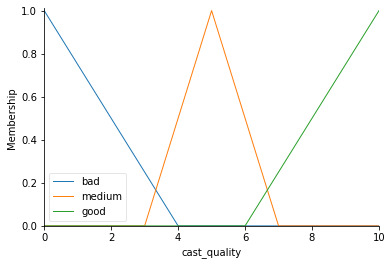

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# New Antecedent/Consequent objects hold universe variables and membership
# functions
cast_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'cast_quality')
interest = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'interest')
satisfaction = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'satisfaction')

cast_quality['bad'] = fuzz.trimf(cast_quality.universe, [0, 0, 4])
cast_quality['medium'] = fuzz.trimf(cast_quality.universe, [3, 5, 7])
cast_quality['good'] = fuzz.trimf(cast_quality.universe, [6, 10, 10])

cast_quality.view()

E:\Programas\Anaconda3\envs\fuzzy_logic\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


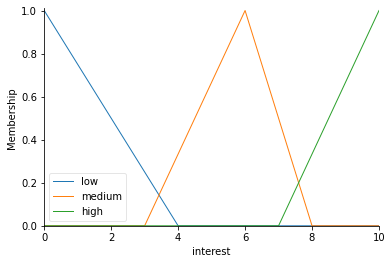

In [2]:
interest['low'] = fuzz.trimf(interest.universe, [0, 0, 4])
interest['medium'] = fuzz.trimf(interest.universe, [3, 6, 8])
interest['high'] = fuzz.trimf(interest.universe, [7, 10, 10])

interest.view()

E:\Programas\Anaconda3\envs\fuzzy_logic\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


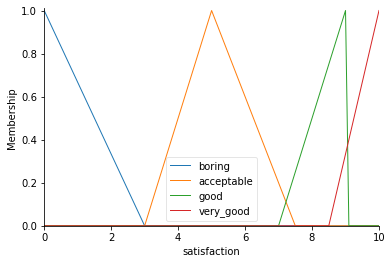

In [3]:
satisfaction['boring'] = fuzz.trimf(satisfaction.universe, [0, 0, 3])
satisfaction['acceptable'] = fuzz.trimf(satisfaction.universe, [3, 5, 7.5])
satisfaction['good'] = fuzz.trimf(satisfaction.universe, [7, 9, 9])
satisfaction['very_good'] = fuzz.trimf(satisfaction.universe, [8.5, 10, 10])

satisfaction.view()

E:\Programas\Anaconda3\envs\fuzzy_logic\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Satisfacción estimada(sobre 10): 6.717136263102218


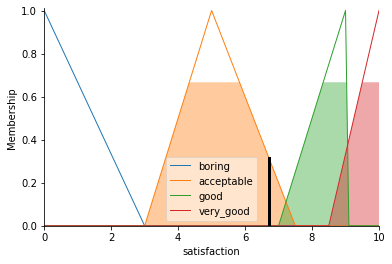

In [4]:
# definimos las reglas

#rule1 ctrl.Rule(interest['high'], satisfaction['acceptable'] | satisfaction['good'] | satisfaction['very_good'])
rule1_1 = ctrl.Rule(interest['high'], satisfaction['acceptable'] )
rule1_2 = ctrl.Rule(interest['high'], satisfaction['good'] )
rule1_3 = ctrl.Rule(interest['high'], satisfaction['very_good'])

#rule2 = ctrl.Rule(cast_quality['good'] & interest['high'], satisfaction['good'] | satisfaction['very_good'])
rule2_1 = ctrl.Rule(cast_quality['good'] & interest['high'], satisfaction['good'] )
rule2_2 = ctrl.Rule(cast_quality['good'] & interest['high'], satisfaction['very_good'])

rule3 = ctrl.Rule(interest['low'], satisfaction['acceptable'])
rule4 = ctrl.Rule(interest['low'] & cast_quality['bad'], satisfaction['boring'])
rule5 = ctrl.Rule(cast_quality['medium'] & interest['medium'], satisfaction['acceptable'])

satisfaction_ctrl = ctrl.ControlSystem([rule1_1, rule1_2, rule1_3, rule2_1, rule2_2, rule3, rule4, rule5])

satEst = ctrl.ControlSystemSimulation(satisfaction_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
satEst.input['cast_quality'] = 7
satEst.input['interest'] = 9

# Crunch the numbers
satEst.compute()

print('Satisfacción estimada(sobre 10):',satEst.output['satisfaction'])
satisfaction.view(sim=satEst)